In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
def test_model(model, har_data_file):
    """
    Test the trained model against the HAR dataset.
    Args:
        model: Trained model to use for testing.
        har_data_file (str): Path to the HAR dataset file (processed).
    """
    # Load HAR dataset (preprocessed to match feature extraction format)
    har_data = pd.read_csv(har_data_file)
    X_har = har_data.drop(columns=["source"])  # Features
    y_har = har_data["source"]  # Labels

    # Predict using the trained model
    y_pred = model.predict(X_har)

    # Evaluate performance
    print("HAR Dataset Classification Report:")
    print(classification_report(y_har, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_har, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix (HAR Dataset)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [3]:
# Path to the saved model
model_path = "../models/random_forest_model.pkl"

# Load the pre-trained Random Forest model
feature_model = joblib.load(model_path)

HAR Dataset Classification Report:
                      precision    recall  f1-score   support

  acc_walking_2_shin       1.00      1.00      1.00       233
   acc_walking_chest       1.00      1.00      1.00       725
 acc_walking_forearm       1.00      1.00      1.00       723
    acc_walking_head       1.00      1.00      1.00       725
    acc_walking_shin       1.00      1.00      1.00       729
   acc_walking_thigh       1.00      1.00      1.00       722
acc_walking_upperarm       1.00      1.00      1.00       724
   acc_walking_waist       1.00      1.00      1.00       726

            accuracy                           1.00      5307
           macro avg       1.00      1.00      1.00      5307
        weighted avg       1.00      1.00      1.00      5307



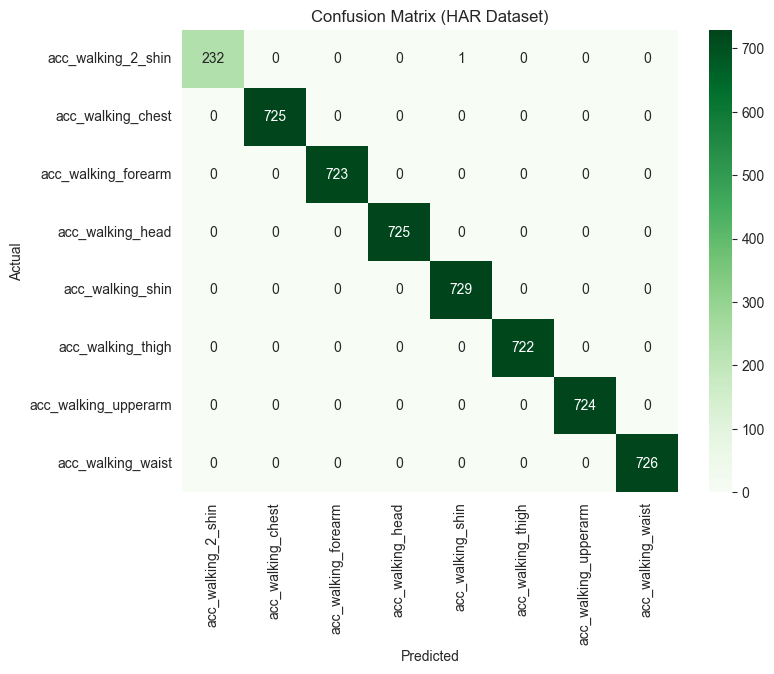

In [4]:
# Path to the HAR test dataset
har_data_file = "../data/processed/test_feature_data.csv"

# Test the model using the HAR dataset
test_model(feature_model, har_data_file)